## 1.1 DATA IMPUTATION.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("DATA/titanic_toy.xlsx")

In [5]:
df.sample(5)

,Age,Fare,Family,Survived
751,6.0,12.4750,1,1
782,29.0,30.0000,0,0
414,44.0,7.9250,0,1
189,36.0,7.8958,0,0
279,35.0,20.2500,2,1


In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

### FINDING MEAN AND MODE FOR AGE AND FARE COLUMN.

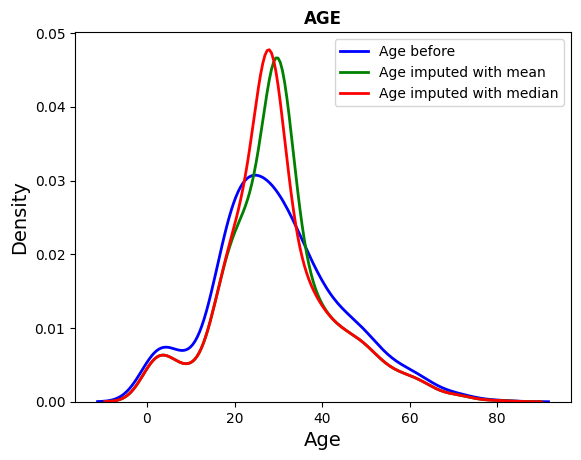

In [31]:
age_mean = round(df['Age'].mean())
age_median = round(df['Age'].median())

df['age_imputed_w_mean']=df['Age'].fillna(age_mean)
df['age_imputed_w_median']=df['Age'].fillna(age_median)

sns.kdeplot(df['Age'], label='Age before', color='blue', linestyle='-', linewidth=2)
sns.kdeplot(df['age_imputed_w_mean'], label='Age imputed with mean', color='green', linewidth=2)
sns.kdeplot(df['age_imputed_w_median'], label='Age imputed with median', color='red', linewidth=2)
plt.legend()
plt.title('AGE', fontsize=12, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

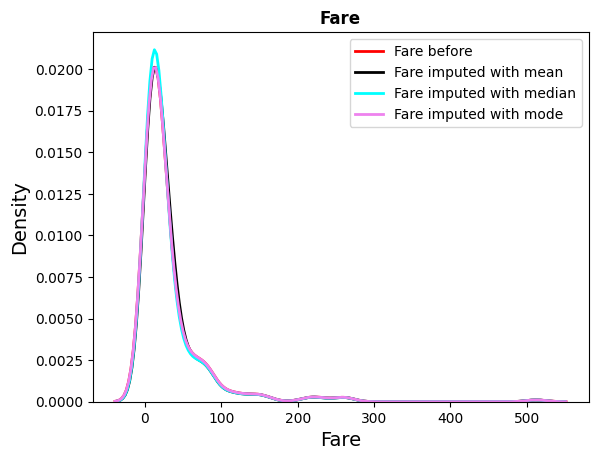

In [38]:
fare_mean = round(df['Fare'].mean())
fare_median = round(df['Fare'].median())
fare_mode = round(df['Fare'].mode())

df['fare_imputed_w_mean']=df['Fare'].fillna(fare_mean)
df['fare_imputed_w_median']=df['Fare'].fillna(fare_median)
df['fare_imputed_w_mode'] =df['Fare'].fillna(fare_mode)

sns.kdeplot(df['Fare'], label='Fare before', color='red', linewidth=2)
sns.kdeplot(df['fare_imputed_w_mean'], label='Fare imputed with mean', color='black', linewidth=2)
sns.kdeplot(df['fare_imputed_w_median'], label='Fare imputed with median', color='cyan', linewidth=2)
sns.kdeplot(df['fare_imputed_w_mode'], label='Fare imputed with mode', color='violet', linewidth=2)
plt.legend()
plt.title('Fare', fontsize=12, fontweight='bold')
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

## 1.2 Handling Categorical Values

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data=pd.DataFrame({
    'Name':['luffy','zoro','nami','zimbae','robin'],
    'Roll no':[12,34,45,12,13],
    'Gender':['M','M','F','M','F'],
    'Marks':['good','poor','avg','excellent','poor']
})


#### ONE HOT ENCODING using pandas.

In [42]:
pd.get_dummies(data, columns=['Gender', 'Marks'], dtype = 'int')

,Name,Roll no,Gender_F,Gender_M,Marks_avg,Marks_excellent,Marks_good,Marks_poor
0,luffy,12,0,1,0,0,1,0
1,zoro,34,0,1,0,0,0,1
2,nami,45,1,0,1,0,0,0
3,zimbae,12,0,1,0,1,0,0
4,robin,13,1,0,0,0,0,1


#### USING LABELENCODER FROM SKLEARN

In [44]:
data

,Name,Roll no,Gender,Marks
0,luffy,12,M,good
1,zoro,34,M,poor
2,nami,45,F,avg
3,zimbae,12,M,excellent
4,robin,13,F,poor


In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender_encoded'] =le.fit_transform(data['Gender'])
data['Marks_encoded'] =le.fit_transform(data['Marks'])
data

,Name,Roll no,Gender,Marks,Gender_encoded,Marks_encoded
0,luffy,12,M,good,1,2
1,zoro,34,M,poor,1,3
2,nami,45,F,avg,0,0
3,zimbae,12,M,excellent,1,1
4,robin,13,F,poor,0,3


## 1.3 Feature Scaling

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
df = pd.read_csv('DATA/Social_Network_Ads - Social_Network_Ads.csv')

In [50]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
32,15573452,Female,21,16000,0
144,15622833,Female,34,25000,0
220,15789432,Female,41,80000,0
286,15631070,Female,37,62000,0
82,15709476,Male,20,49000,0


In [51]:
df.drop(columns=['User ID', 'Gender'], inplace=True)

In [53]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [60]:
std = StandardScaler()
norm = MinMaxScaler()

df['std_age']= std.fit_transform(df['Age'].values.reshape(-1, 1))
df['norm_age'] = norm.fit_transform(df['Age'].values.reshape(-1, 1))
df['std_salary']= std.fit_transform(df['EstimatedSalary'].values.reshape(-1, 1))
df['norm_salary'] = norm.fit_transform(df['EstimatedSalary'].values.reshape(-1, 1))
df.sample(5)

,Age,EstimatedSalary,Purchased,stg_age,norm_age,std_age,std_salary,norm_salary
352,42,90000,1,0.415005,0.571429,0.415005,0.594859,0.555556
16,47,25000,1,0.892570,0.690476,0.892570,-1.313857,0.074074
322,41,52000,0,0.319491,0.547619,0.319491,-0.521006,0.274074
252,48,134000,1,0.988083,0.714286,0.988083,1.886912,0.881481
334,57,60000,1,1.847701,0.928571,1.847701,-0.286087,0.333333


In [63]:
sns.set(style="whitegrid")

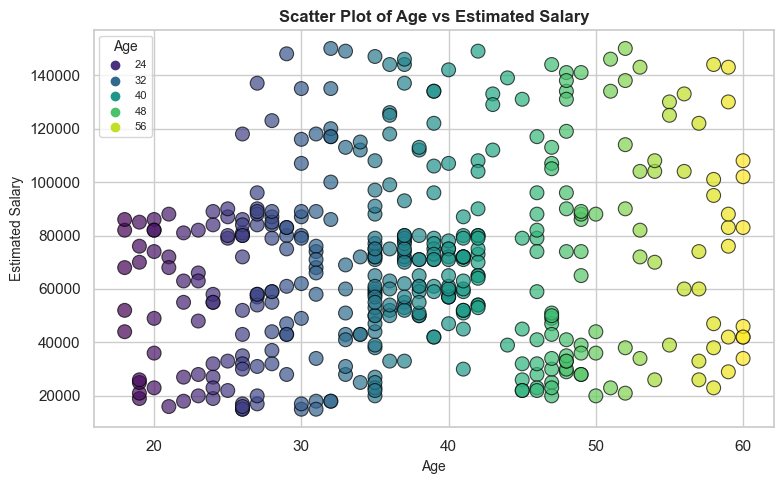

In [73]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df, x='Age', y='EstimatedSalary', 
                hue='Age', palette='viridis', edgecolor='black', 
                s=100, alpha=0.7)
plt.title('Scatter Plot of Age vs Estimated Salary', fontsize=12, fontweight='bold')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Estimated Salary', fontsize=10)
plt.legend(title='Age', title_fontsize='10', fontsize='8', loc='upper left')
plt.tight_layout()
plt.show()

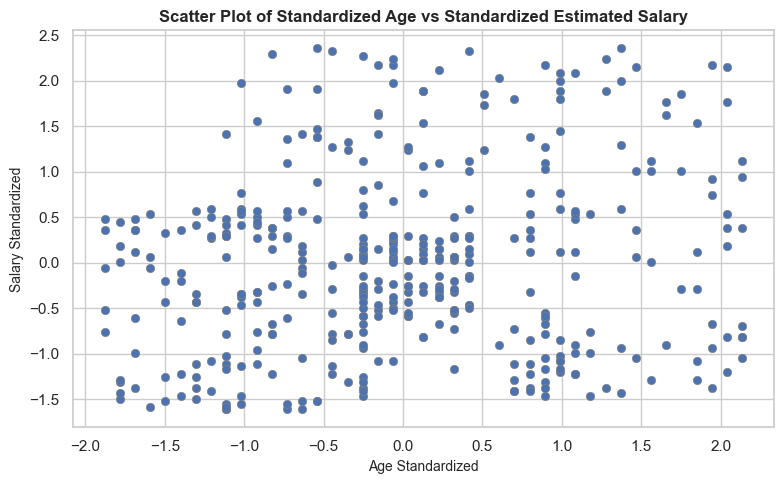

In [80]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df, x='std_age', y='std_salary', edgecolor='grey')
plt.title('Scatter Plot of Standardized Age vs Standardized Estimated Salary', fontsize=12, fontweight='bold')
plt.xlabel('Age Standardized', fontsize=10)
plt.ylabel('Salary Standardized', fontsize=10)
plt.tight_layout()
plt.show()

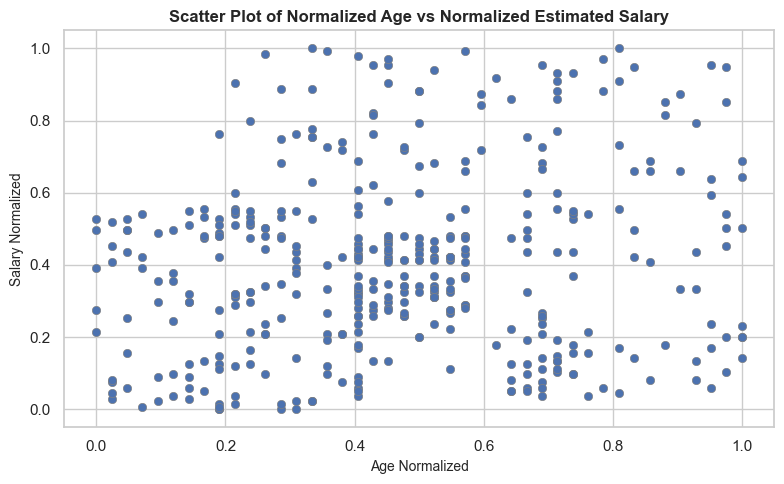

In [81]:
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df, x='norm_age', y='norm_salary', edgecolor='grey')
plt.title('Scatter Plot of Normalized Age vs Normalized Estimated Salary', fontsize=12, fontweight='bold')
plt.xlabel('Age Normalized', fontsize=10)
plt.ylabel('Salary Normalized', fontsize=10)
plt.tight_layout()
plt.show()

## 1.4 Feature Selection 

In [87]:
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns

diabetes  = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.sample()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
422,-0.078165,0.05068,0.077863,0.052858,0.078236,0.064447,0.02655,-0.002592,0.040673,-0.009362,233.0


In [88]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


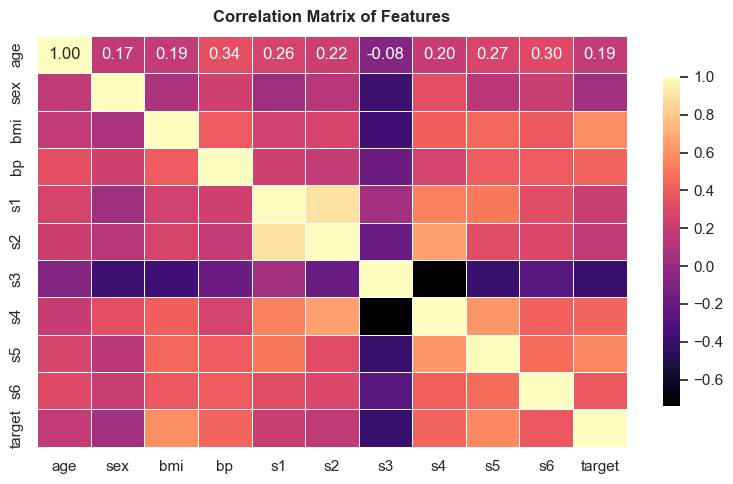

In [106]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='magma', 
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='white',)
plt.title('Correlation Matrix of Features', fontsize=12, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()